In [1]:
# import the required packages
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA 
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.preprocessing import StandardScaler, normalize 
from sklearn.metrics import silhouette_score 
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy import stats
import scipy.cluster.hierarchy as shc 
from sklearn.cluster import AgglomerativeClustering 



#import dataset
df = pd.read_csv('Used_Car_Price.csv')
df_dictionary = pd.read_csv('Used_Car_Price_DataDictionary.csv')

## 1. Build Clustering Models using Numerical Data

### 1.1 Data exploration and manipulation

In [2]:
df = df.dropna()

In [3]:
df.describe()

,PRICE,YEAR,KILOMETER,ENGINE CAPACITY,LENGTH,WIDTH,HEIGHT,SEATING CAPACITY,FUEL TANK CAPACITY
count,1874.000000,1874.000000,1.874000e+03,1874.000000,1874.000000,1874.000000,1874.000000,1874.000000,1874.000000
mean,42956.977054,2016.713447,5.317814e+04,1682.829242,4281.512807,1767.886339,1588.967983,5.295091,52.217343
std,60652.258402,3.138477,5.878833e+04,633.055721,436.220747,131.344883,134.627659,0.807008,15.167250
min,1225.000000,1988.000000,0.000000e+00,624.000000,3099.000000,1475.000000,1213.000000,2.000000,15.000000
25%,12500.000000,2015.000000,2.801975e+04,1197.000000,3985.000000,1695.000000,1485.000000,5.000000,42.000000
50%,21062.500000,2017.000000,4.879750e+04,1497.000000,4360.000000,1770.000000,1544.000000,5.000000,50.000000
75%,47706.250000,2019.000000,7.100000e+04,1995.000000,4620.000000,1831.000000,1670.750000,5.000000,60.000000
max,875000.000000,2022.000000,2.000000e+06,6592.000000,5569.000000,2220.000000,1995.000000,8.000000,105.000000


In [4]:
df_dictionary.describe()

,MAKE,Make of Car
count,18,18
unique,18,18
top,MODEL,Model of Car
freq,1,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1874 entries, 0 to 2057
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MAKE                1874 non-null   object 
 1   MODEL               1874 non-null   object 
 2   PRICE               1874 non-null   int64  
 3   YEAR                1874 non-null   int64  
 4   KILOMETER           1874 non-null   int64  
 5   FUEL TYPE           1874 non-null   object 
 6   TRANSMISSION        1874 non-null   object 
 7   COLOR               1874 non-null   object 
 8   OWNER               1874 non-null   object 
 9   SELLER TYPE         1874 non-null   object 
 10  ENGINE CAPACITY     1874 non-null   float64
 11  MAX POWER           1874 non-null   object 
 12  MAX TORQUE          1874 non-null   object 
 13  DRIVETRAIN          1874 non-null   object 
 14  LENGTH              1874 non-null   float64
 15  WIDTH               1874 non-null   float64
 16  HEIGHT

In [6]:
df_dictionary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   MAKE         18 non-null     object
 1   Make of Car  18 non-null     object
dtypes: object(2)
memory usage: 416.0+ bytes


In [7]:
#convert to numpy arrays
x =df.values
y =df_dictionary.values

In [8]:
#show numpy arrays
print(x)
print('\n')
print(y)

[['Honda' 'Amaze 1.2 VX i-VTEC' 12625 ... 1505.0 5.0 35.0]
 ['Maruti Suzuki' 'Swift DZire VDI' 11250 ... 1555.0 5.0 42.0]
 ['Hyundai' 'i10 Magna 1.2 Kappa2' 5500 ... 1550.0 5.0 35.0]
 ...
 ['Hyundai' 'Eon D-Lite +' 6875 ... 1500.0 5.0 32.0]
 ['Ford' 'Figo Duratec Petrol ZXI 1.2' 6000 ... 1427.0 5.0 45.0]
 ['BMW' '5-Series 520d Luxury Line [2017-2019]' 107250 ... 1479.0 5.0
  65.0]]


[['MODEL' 'Model of Car']
 ['PRICE' 'Price of Car ($)']
 ['YEAR' 'Manufactured Year of Car ']
 ['KILOMETER' 'Mileage in KM']
 ['FUEL TYPE' 'Fuel Type of Car']
 ['TRANSMISSION' 'Transmission of Car']
 ['COLOR' 'Color of Car']
 ['OWNER' 'Type of Car Ownership']
 ['SELLER TYPE' 'Type of Car Seller']
 ['ENGINE CAPACITY ' 'Engine Capacity in CC ']
 ['MAX POWER' 'Max Power of Car']
 ['MAX TORQUE' 'Max Torque of Car']
 ['DRIVETRAIN' 'Type of  Drivetrain']
 ['LENGTH' 'Length of Car']
 ['WIDTH' 'Width of Car']
 ['HEIGHT' 'Height of Car']
 ['SEATING CAPACITY' 'Seating Capacity of Car']
 ['FUEL TANK CAPACITY' 'Fuel T

In [9]:
def assign_numerical_value(df, index):
    numerical_value = []
    for i in range(len(df)):
        if not df[i][index] in numerical_value:
            numerical_value.append(df[i][index])
            df[i][index] = len(numerical_value)-1
        else: df[i][index] = numerical_value.index(df[i][index])
    return df, numerical_value


In [10]:
# Assign numerical values to non-numeric variables.
x, BRAND = assign_numerical_value(x, 0)
x, MODEL = assign_numerical_value(x, 1)
x, FUEL = assign_numerical_value(x, 5)
x, TRANSMISSION = assign_numerical_value(x, 6)
x, COLOUR = assign_numerical_value(x, 7)
x, OWNER = assign_numerical_value(x, 8)
x, SELLER = assign_numerical_value(x, 9)
x, MAX_POWER = assign_numerical_value(x, 11)
x, MAX_TORQUE = assign_numerical_value(x, 12)
x, DRIVE_TRAIN = assign_numerical_value(x, 13)

In [11]:
df = pd.DataFrame(x, columns = ['MAKE','MODEL','PRICE','YEAR','KILOMETER','FUEL TYPE','TRANSMISSION','COLOR','OWNER','SELLER TYPE','ENGINE CAPACITY ','MAX POWER','MAX TORQUE','DRIVETRAIN','LENGTH','WIDTH','HEIGHT','SEATING CAPACITY','FUEL TANK CAPACITY'])
#for Kmeans
Z = df.iloc[:,[2,10,18]]
#for hierarchical
V= df.iloc[:,[2,10]]

In [12]:
scaler = StandardScaler() 
Z_scaled = scaler.fit_transform(Z) 
V_scaled = scaler.fit_transform(V)

In [13]:
print(Z_scaled)

[[-0.5002299  -0.76605998 -1.13546877]
 [-0.52290617 -0.68705691 -0.67382486]
 [-0.61773421 -0.76764004 -1.13546877]
 ...
 [-0.59505794 -1.37280356 -1.33331616]
 [-0.60948829 -0.7692201  -0.47597746]
 [ 1.0603098   0.49324897  0.84300514]]


Text(0, 0.5, 'ENGINE CAPACITY ')

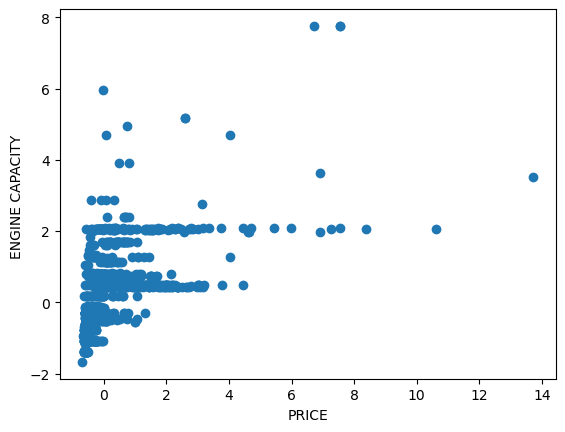

In [14]:
plt.scatter(Z_scaled[:,0], Z_scaled[:,1])
plt.xlabel('PRICE')
plt.ylabel('ENGINE CAPACITY ')

### 1.2 K-Means Clustering

C:\Users\isaac\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
C:\Users\isaac\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
C:\Users\isaac\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
C:\Users\isaac\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

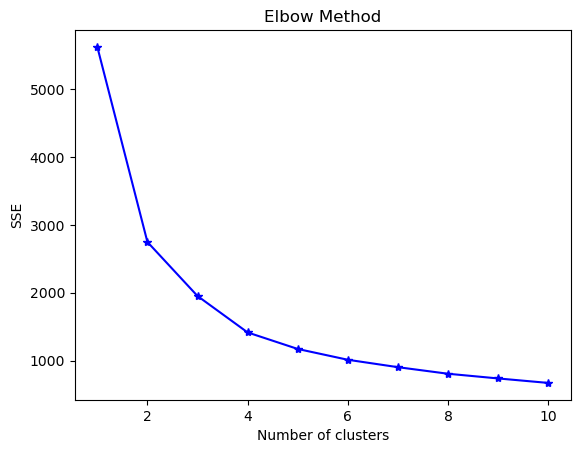

In [15]:
# Find the optimal number of clusters (i.e. K) using elbow method
sse = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, n_init=20, random_state=1)
    kmeans.fit(Z_scaled)
    sse.append(kmeans.inertia_)
plt.plot(range(1, 11), sse, 'b-*')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [16]:
# Build the model using the optimal n_cluster
kmeans = KMeans(n_clusters=2, n_init=20, random_state=1)
# Fit the model and assign each data point to the cluster
y_pred = kmeans.fit_predict(Z_scaled) # fit and then predict

C:\Users\isaac\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


In [17]:
kmeans.cluster_centers_

array([[-0.4100246 , -0.58929506, -0.59360603],
       [ 0.72496226,  1.04192938,  1.04955158]])

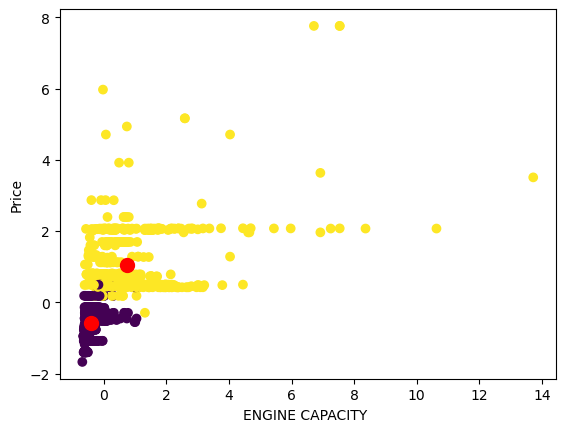

In [18]:
plt.scatter(Z_scaled[:,0], Z_scaled[:,1], c=y_pred)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red')
plt.xlabel('ENGINE CAPACITY ')
plt.ylabel('Price')
plt.show()

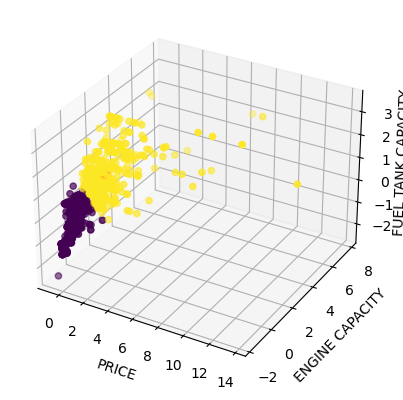

In [19]:
#Visualise the Clusters

fig = plt.figure(20)
ax = plt.axes(projection='3d')
ax.scatter3D(Z_scaled[:,0], Z_scaled[:,1], Z_scaled[:,2], c=y_pred);
ax.scatter3D(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],kmeans.cluster_centers_[:, 2], s=50, c='red')

 

ax.set_xlabel('PRICE')
ax.set_ylabel('ENGINE CAPACITY')
 
ax.zaxis.labelpad = -2
ax.set_zlabel('FUEL TANK CAPACITY')
plt.show()

In [20]:
kmeans.inertia_

2746.766132262346

In [21]:
score = silhouette_score(Z_scaled, kmeans.labels_, metric='euclidean')
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.542


MAKE


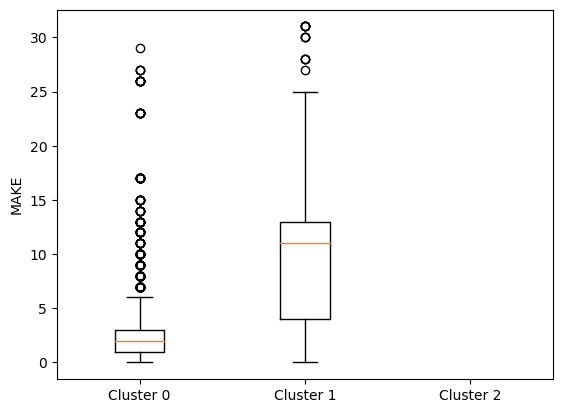

MODEL


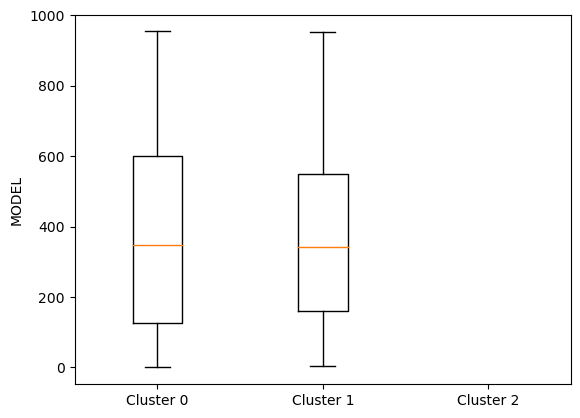

PRICE


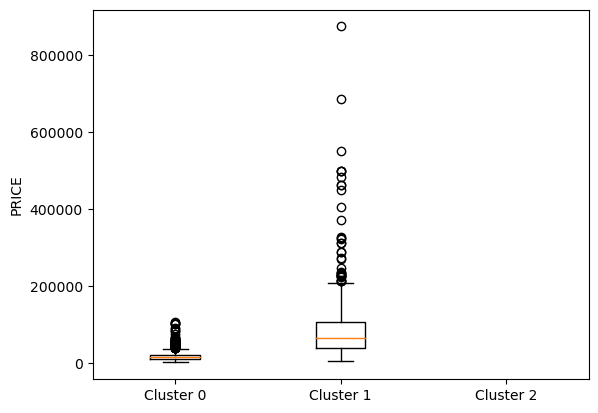

YEAR


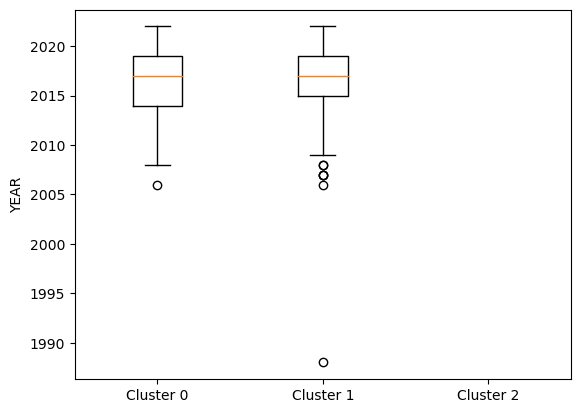

KILOMETER


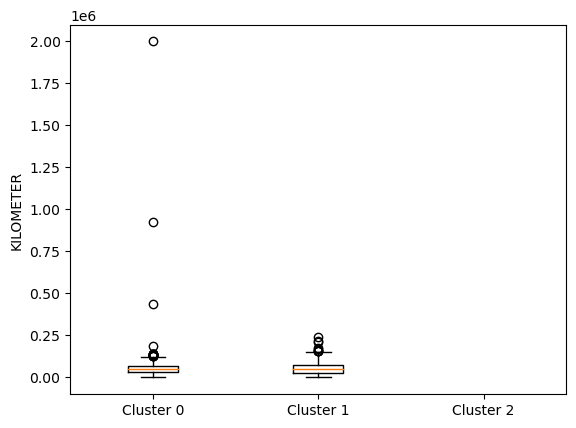

FUEL TYPE


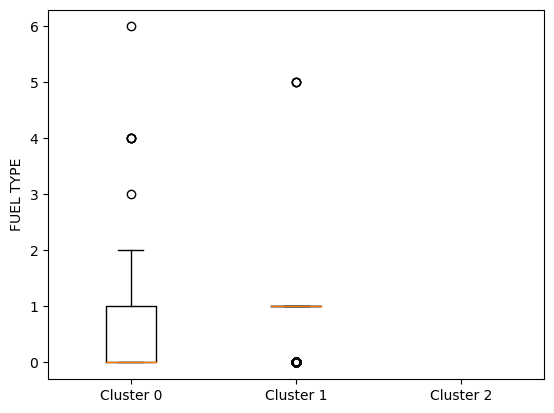

TRANSMISSION


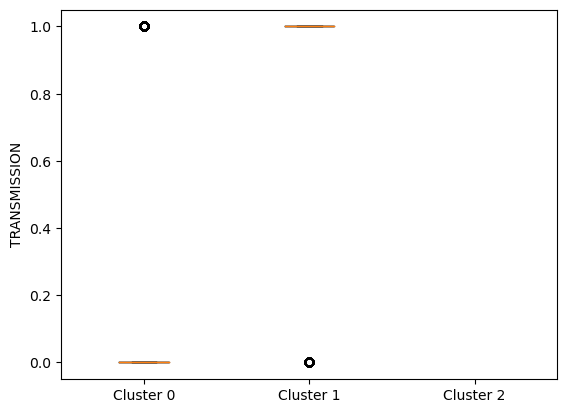

COLOR


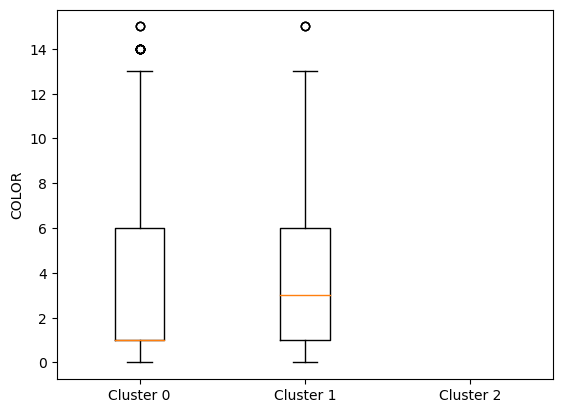

OWNER


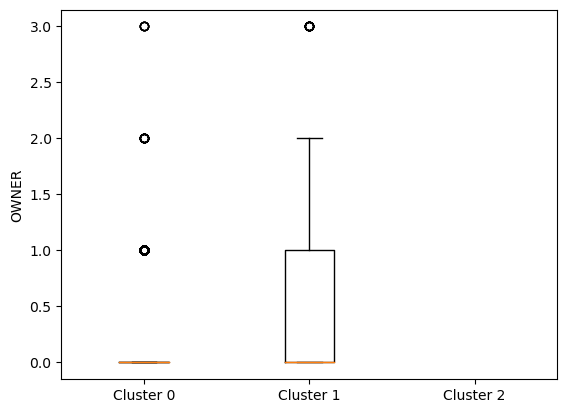

SELLER TYPE


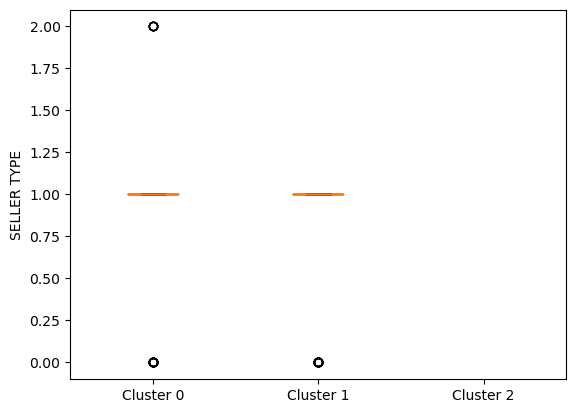

ENGINE CAPACITY 


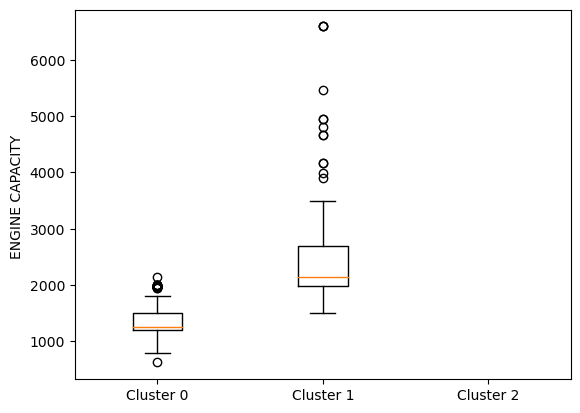

MAX POWER


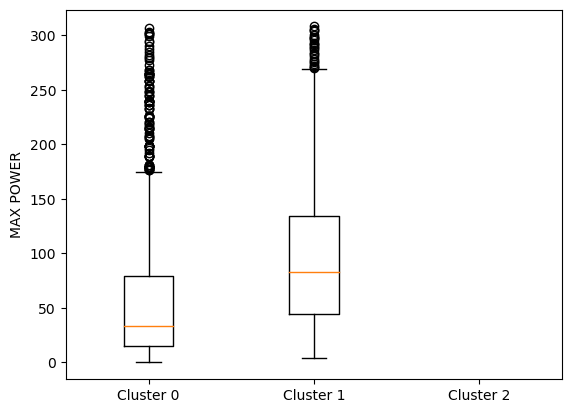

MAX TORQUE


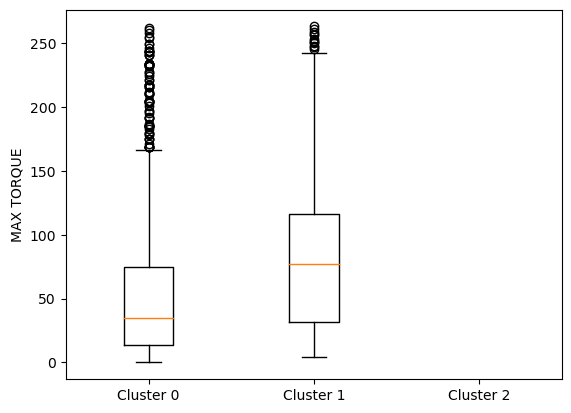

DRIVETRAIN


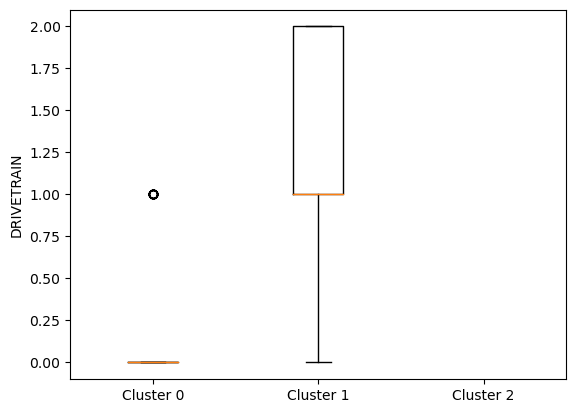

LENGTH


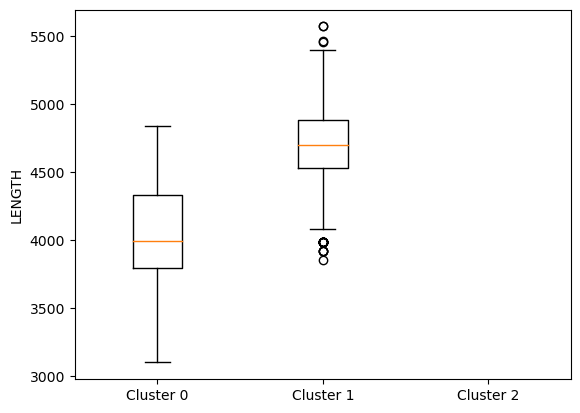

WIDTH


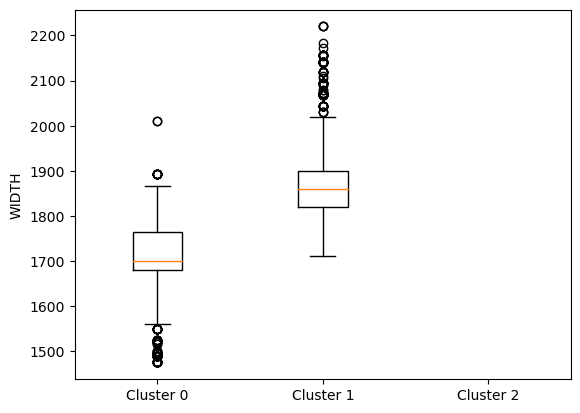

HEIGHT


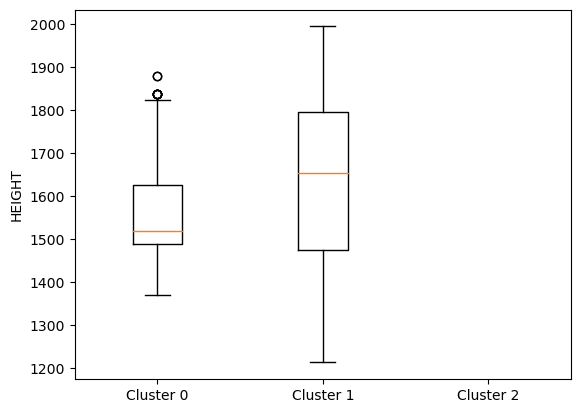

SEATING CAPACITY


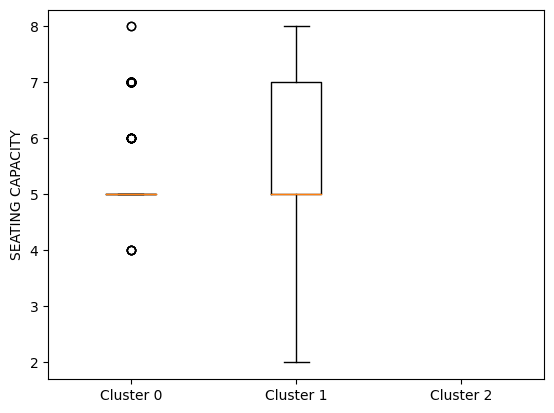

FUEL TANK CAPACITY


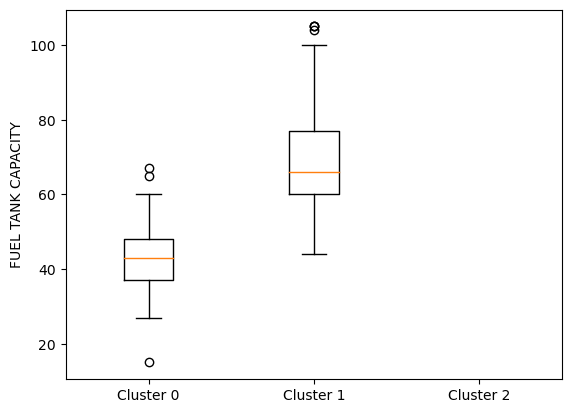

Cluster


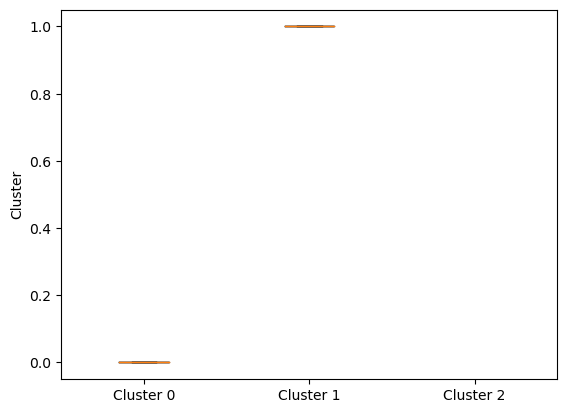

In [22]:
X_filter = df
X_filter['Cluster'] = y_pred

i = 0
for col in X_filter:
    print(col)
    plt.cla()
    plt.boxplot([X_filter.iloc[:, i][X_filter.Cluster == 0].tolist(),
                 X_filter.iloc[:, i][X_filter.Cluster == 1].tolist(),
                 X_filter.iloc[:, i][X_filter.Cluster == 2].tolist(),
                 ],
                labels=('Cluster 0', 'Cluster 1', 'Cluster 2'))
    plt.ylabel(col)
    plt.show()
    i += 1

### 1.3 Hierarchical Clustering

In [23]:
complete_clustering = shc.linkage(V, method="complete", metric="euclidean")

Text(0.5, 1.0, 'COMPLETE')

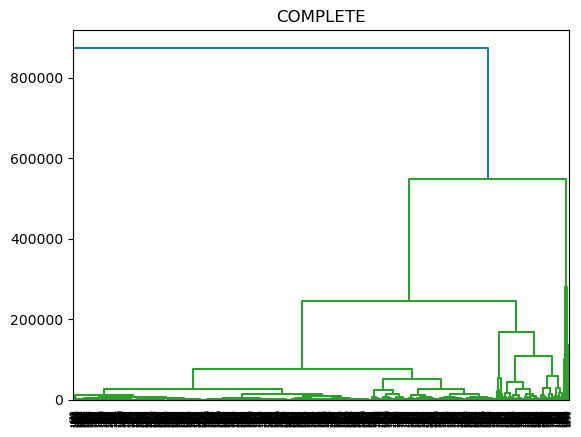

In [24]:
Dendrogram = shc.dendrogram(complete_clustering)
plt.title('COMPLETE')

In [25]:
average_clustering = shc.linkage(V, method="average", metric="euclidean")

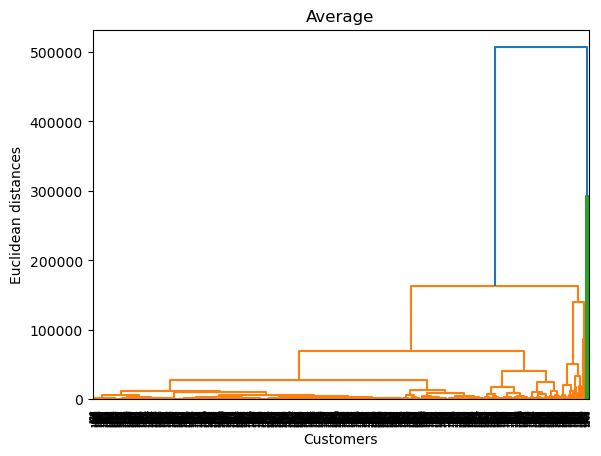

In [26]:
shc.dendrogram(average_clustering)
plt.title("Average")
plt.xlabel('Customers') # label of the x-axis
plt.ylabel('Euclidean distances') # label of the y-axis
plt.show()

In [27]:
single_clustering = shc.linkage(V, method="single", metric="euclidean")

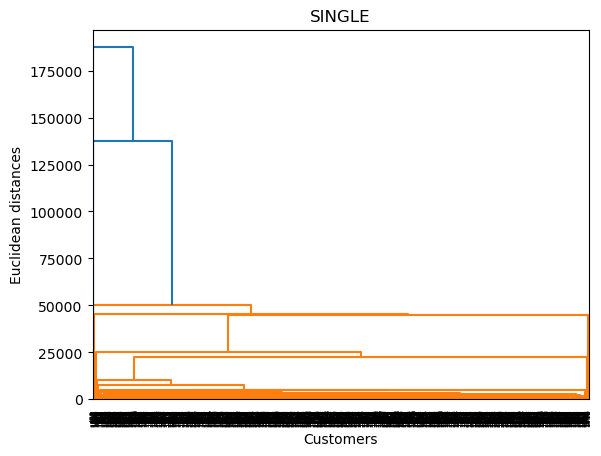

In [28]:
shc.dendrogram(single_clustering)
plt.title("SINGLE")
plt.xlabel('Customers') # label of the x-axis
plt.ylabel('Euclidean distances') # label of the y-axis
plt.show()

In [29]:
ward_clustering = shc.linkage(V, method  = "ward")

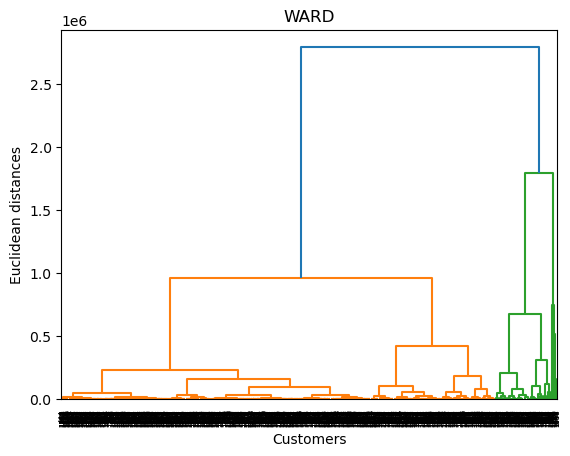

In [30]:
shc.dendrogram(ward_clustering)
plt.title("WARD")
plt.xlabel('Customers') # label of the x-axis
plt.ylabel('Euclidean distances') # label of the y-axis
plt.show()

In [31]:
hc = AgglomerativeClustering(n_clusters = 2)

In [32]:
hc.fit_predict(V_scaled)

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

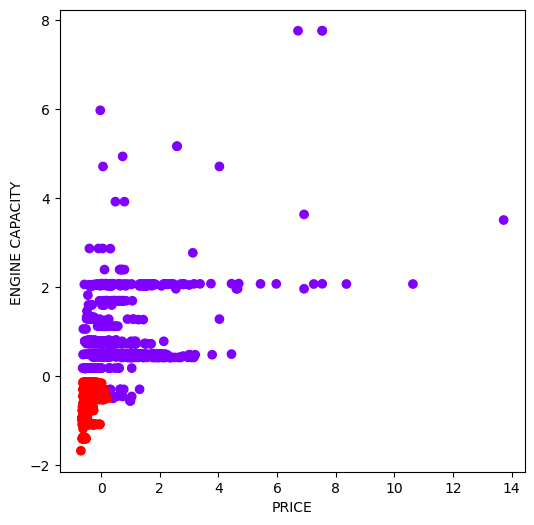

In [33]:
plt.figure(figsize =(6, 6)) 
plt.scatter(V_scaled[:,0], V_scaled[:,1], 
            c = hc.fit_predict(V_scaled), cmap ='rainbow') 
plt.xlabel('PRICE')
plt.ylabel('ENGINE CAPACITY ')
plt.show() 

In [34]:
hc.n_clusters_

2

In [35]:
hc.labels_

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

In [36]:
silhouette_score(V_scaled, hc.labels_)

0.5562960812026331

In [37]:
k_range = range(2,10)
silhouette_scores =[]

for i in k_range:
    hc_i = AgglomerativeClustering(n_clusters = i,linkage='ward')
    silhouette_scores.append(silhouette_score(V_scaled, hc_i.fit_predict(V_scaled)))

In [38]:
silhouette_scores

[0.5562960812026331,
 0.5770458926068368,
 0.5612839586565475,
 0.5738696020997505,
 0.5805678336861071,
 0.5612297015014488,
 0.5092029287339045,
 0.5106763887467776]

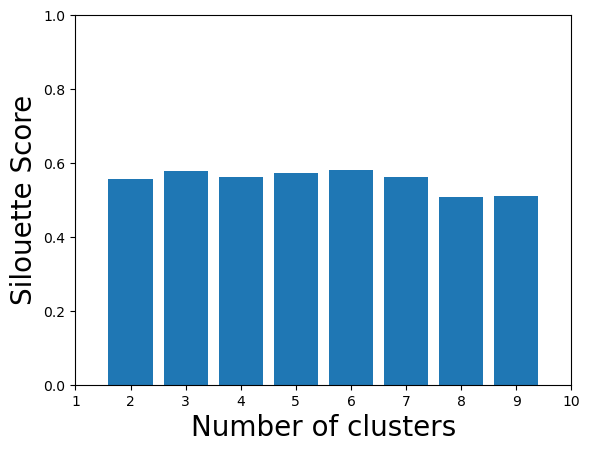

In [39]:
plt.bar(k_range, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('Silouette Score', fontsize = 20)
plt.axis([1, 10, 0, 1])
plt.show() 

In [40]:
ac = AgglomerativeClustering(n_clusters = 6)
ac

AgglomerativeClustering(n_clusters=6)

In [41]:
ac.fit_predict(V_scaled)

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

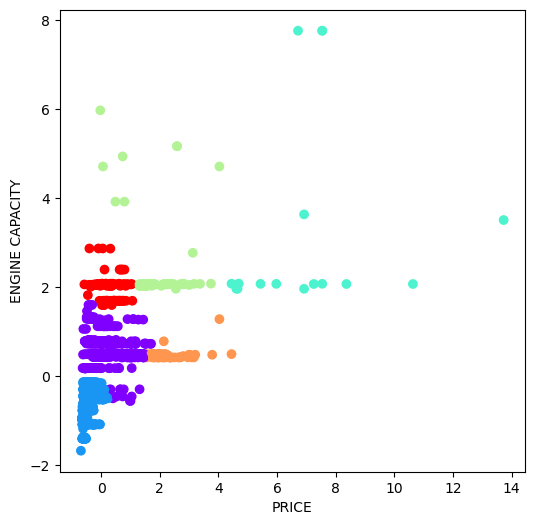

In [42]:
# scatter plot
plt.figure(figsize =(6, 6)) 
plt.scatter(V_scaled[:,0], V_scaled[:,1], 
            c = ac.fit_predict(V_scaled), cmap ='rainbow')
plt.xlabel('PRICE')
plt.ylabel('ENGINE CAPACITY')
plt.show() 

In [43]:
silhouette_score(V_scaled, ac.fit_predict(V_scaled))

0.5805678336861071

PRICE


C:\Users\isaac\AppData\Local\Temp\ipykernel_9940\1651264253.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  V['Cluster'] = ac.fit_predict(V_scaled)


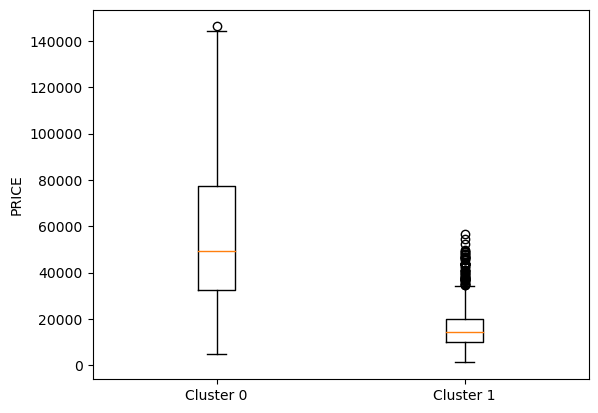

ENGINE CAPACITY 


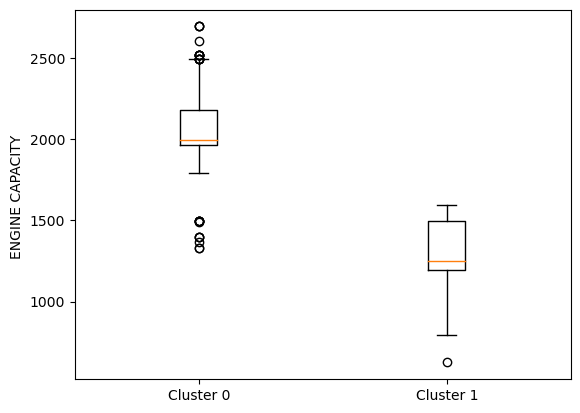

Cluster


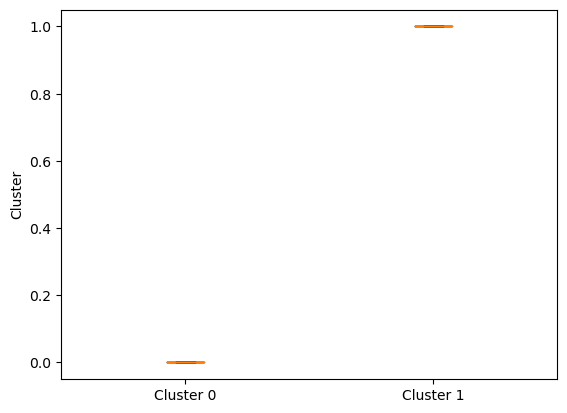

In [44]:
V['Cluster'] = ac.fit_predict(V_scaled)

i = 0
for col in V:
    print(col)
    plt.cla()
    plt.boxplot([V.iloc[:, i][V.Cluster == 0].tolist(),
                 V.iloc[:, i][V.Cluster == 1].tolist(),
                 ],
                labels=('Cluster 0', 'Cluster 1'))
    plt.ylabel(col)
    plt.show()
    i += 1